# This notebook compares the cross-linking data to the ground truth data.

In [1]:
import os
import yaml
import glob
import sys
### If you get errors during plotting, check if the correct version of seaborn is installed.
### This code will run properly under seaborn version 0.11.1. (But NOT 0.11.2!)
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pyRBDome.Functions.RBDomeAnalysisCode import *
from pyRBDome.Functions.RBDomeSQL import *
from pyRBDome.Classes.PDBAnalyser import * 
from scipy.stats import ks_2samp,kstest

matplotlib.rcParams['font.family'] = 'Arial'

In [2]:
settings_file = open('settings.yaml','r')
settings = yaml.load(settings_file,Loader=yaml.FullLoader)

In [3]:
### Parameters:
out_dir = os.path.abspath(settings[0]['general']['out_dir'])
data = os.path.abspath(settings[0]['general']['datafile'])
pdb_dir = os.path.abspath(settings[0]['general']['pdb_dir'])
proteome = os.path.abspath(settings[0]['general']['proteome'])

### Database parameters
database_name = settings[4]['database']['database_name']

In [4]:
out_dir

'/home/pyrbdome/Documents/pyRBDome_analyses/Sander_Granneman/pyRBDome_Notebooks_Ground_truth_analyses/analysis_results'

In [5]:
database_name

'pyrbdome_full.db'

In [6]:
listTablesFromSQLite(database_name)

['interpro_results',
 'InterProScan_Pfam_data',
 'available_pdbs',
 'pyrbdome_analysis',
 'processed_files_log',
 'trypsin_in_silico_peptides',
 'Lys_C_in_silico_peptides',
 'random_peptides',
 'RNA_binding_peptides_with_match_in_pdb',
 'trypsin_peptides_with_match_in_pdb',
 'lys_C_peptides_with_match_in_pdb',
 'random_peptides_with_match_in_pdb',
 'RNA_binding_amino_acids_with_match_in_pdb',
 'trypsin_amino_acids_with_match_in_pdb',
 'lys_C_amino_acids_with_match_in_pdb',
 'random_amino_acids_with_match_in_pdb',
 'All_combined_results',
 'Experimental_and_Ground_Truth_data']

### Loading all the experimental and ground truth data file:

In [29]:
exp_gt_table = loadTableFromSQLite('Experimental_and_Ground_Truth_data',database_name,verbose=True)

Table 'Experimental_and_Ground_Truth_data' successfully loaded from database 'pyrbdome_full.db' 


### Now converting the data containing prediciton results to numerical values:

In [30]:
numerical_columns = ['Cross-linked_amino_acid', 'Distance_to_RNA', 'hbond', 'hydrophobic',
                     'saltbridge', 'pication', 'pistacking', 'all', 'Distance_to_PLIP']

In [31]:
exp_gt_table = convertToNumeric(exp_gt_table,numerical_columns)

In [32]:
exp_gt_table.head()

ID         pdb_id  residue_number amino_acid  Peptide  \
0  P23396  P23396_merged               1          M      NaN   
1  P23396  P23396_merged               2          A      NaN   
2  P23396  P23396_merged               3          V      NaN   
3  P23396  P23396_merged               4          Q      NaN   
4  P23396  P23396_merged               5          I      NaN   

   Cross-linked_amino_acid  Distance_to_RNA hbond hydrophobic saltbridge  \
0                      NaN             8.07   NaN         NaN        NaN   
1                      NaN             4.78   NaN         NaN        NaN   
2                      NaN             2.88   NaN         NaN        NaN   
3                      NaN             2.62   NaN         NaN        NaN   
4                      NaN             2.85   NaN         NaN        NaN   

  pication pistacking  all  Distance_to_PLIP  
0      NaN        NaN  NaN               NaN  
1      NaN        NaN  NaN               NaN  
2      NaN        NaN  NaN               NaN  
3      NaN        NaN  NaN               NaN  
4      NaN        NaN  NaN               NaN

### Loading the table containing all the data:

In [33]:
all_results_table = loadTableFromSQLite('All_combined_results',database_name,verbose=True)

Table 'All_combined_results' successfully loaded from database 'pyrbdome_full.db' 


In [35]:
all_results_table.columns

Index(['ID', 'pdb_id', 'residue_number', 'amino_acid', 'aaRNA', 'PST_PRNA',
       'BindUP', 'FTMap_distances', 'RNABindRPlus', 'DisoRDPbind', 'HydRa',
       'Distance_to_RNA', 'PLIP', 'Distance_to_PLIP'],
      dtype='object')

### Now converting the data containing prediciton results to numerical values:

In [36]:
numerical_columns = ['aaRNA', 'PST_PRNA','BindUP', 'FTMap_distances', 'RNABindRPlus', 
                     'DisoRDPbind', 'HydRa','Distance_to_RNA', 'PLIP', 'Distance_to_PLIP']

In [37]:
all_results_table = convertToNumeric(all_results_table,numerical_columns)

In [38]:
all_results_table.head()

ID         pdb_id  residue_number amino_acid  aaRNA PST_PRNA BindUP  \
0  P23396  P23396_merged               1          M  53.46      0.0    0.0   
1  P23396  P23396_merged               2          A  47.02     0.02    0.0   
2  P23396  P23396_merged               3          V  37.38     0.01    0.0   
3  P23396  P23396_merged               4          Q  57.55     0.16    0.0   
4  P23396  P23396_merged               5          I  42.46     0.05    0.0   

  FTMap_distances  RNABindRPlus  DisoRDPbind  HydRa  Distance_to_RNA PLIP  \
0           14.07          0.25         0.16    0.0             8.07  NaN   
1           14.31          0.24         0.17    0.0             4.78  NaN   
2            9.73          0.68         0.17    0.0             2.88  NaN   
3           11.99          0.68         0.17    0.0             2.62  NaN   
4            8.22          0.13         0.16    0.0             2.85  NaN   

   Distance_to_PLIP  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

### Let's have a look at the cross-linked amino acids:

In [39]:
cross_linked_aa_data = exp_gt_table[exp_gt_table['Cross-linked_amino_acid'] == 1]

In [40]:
cross_linked_aa_data.head()

ID         pdb_id  residue_number amino_acid  Peptide  \
53  P23396  P23396_merged              54          R      1.0   
57  P23396  P23396_merged              58          V      1.0   
82  P23396  P23396_merged              83          S      1.0   
86  P23396  P23396_merged              87          Y      1.0   
89  P23396  P23396_merged              90          K      1.0   

    Cross-linked_amino_acid  Distance_to_RNA hbond hydrophobic saltbridge  \
53                      1.0            16.18   NaN         NaN        NaN   
57                      1.0            18.13   NaN         NaN        NaN   
82                      1.0            12.49   NaN         NaN        NaN   
86                      1.0            18.25   NaN         NaN        NaN   
89                      1.0            16.53   NaN         NaN        NaN   

   pication pistacking  all  Distance_to_PLIP  
53      NaN        NaN  NaN               NaN  
57      NaN        NaN  NaN               NaN  
82      NaN        NaN  NaN               NaN  
86      NaN        NaN  NaN               NaN  
89      NaN        NaN  NaN               NaN

### Plotting the cumulative distances to RNA and PLIP sites for cross-linked amino acids:

### For distance data:

### Shuffling the amino acids over each protein individually. Doing 100 randomisations:

In [41]:
uniprot_ids_cross_links_detected = list(set(cross_linked_aa_data.loc[:,'ID']))

In [42]:
selected_uniprot_data = exp_gt_table.loc[exp_gt_table['ID'].isin(uniprot_ids_cross_links_detected)]

In [43]:
randomised_amino_acid_distances = list()

for uniprot_id in list(set(selected_uniprot_data['ID'])):
    protein_data = selected_uniprot_data.loc[selected_uniprot_data['ID'] == uniprot_id]
    protein_data['Cross-linked_amino_acid'].replace(np.nan,0,inplace=True)
    if sum(protein_data['Cross-linked_amino_acid'].values) > 0:
        for i in range(100):
            protein_data['Shuffled_cross_links'] = np.random.permutation(protein_data['Cross-linked_amino_acid'].values)
            distances = protein_data.loc[protein_data['Shuffled_cross_links'] == 1,'Distance_to_RNA'].values
            randomised_amino_acid_distances.extend(distances)

### Plot the cumulative distributions:

Cross-linked vs all amino acids:	KstestResult(statistic=0.45643634842801817, pvalue=1.202648687752147e-69, statistic_location=8.03, statistic_sign=1)
Cross-linked vs random amino acids:	KstestResult(statistic=0.298598901098901, pvalue=5.886350051151613e-29, statistic_location=8.03, statistic_sign=1)


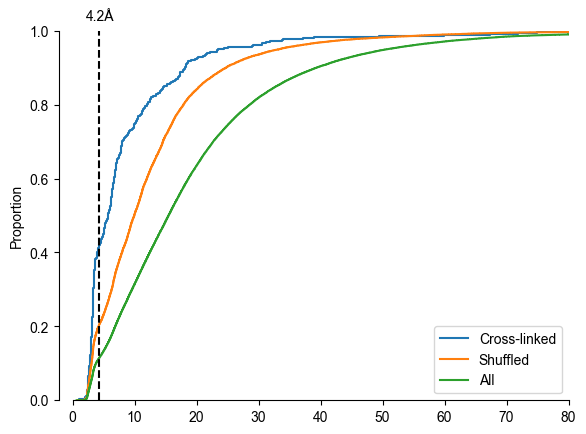

In [44]:
fig,ax = plt.subplots()
cross_linked = cross_linked_aa_data['Distance_to_RNA'].values
all_data = exp_gt_table['Distance_to_RNA'].values
random_data = randomised_amino_acid_distances

sns.ecdfplot(cross_linked,label="Cross-linked",ax=ax)
sns.ecdfplot(random_data,label="Shuffled",ax=ax)
sns.ecdfplot(all_data,label="All",ax=ax)
ax.legend()

# Adding a vertical line marking 4.2Å distance:
ax.vlines(x=4.2,ymin=0,ymax=1,linestyle="--",color="black")

# Add label to the vertical line
plt.text(4.5, 1.02, '4.2Å', rotation=0,verticalalignment='bottom',horizontalalignment='center')

# Set the x-axis limits
ax.set_xlim([0,80])  # Adjust the limits as needed

# Adjust the position of the spines
ax.spines['left'].set_position(('outward', 10))

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sys.stdout.write(f"Cross-linked vs all amino acids:\t{ks_2samp(cross_linked,all_data)}\n")
sys.stdout.write(f"Cross-linked vs random amino acids:\t{ks_2samp(cross_linked,random_data)}\n")

# Save the figure:
fig.savefig(f"{out_dir}/Cross_linked_amino_acids_vs_Shuffled_and_Total_ecdf_plot.pdf",dpi=400)

### How many cross-linked amino acids were within hydrogen bonding distance of RNA?

In [45]:
uniprots_with_RNA = list(set(exp_gt_table.loc[exp_gt_table['Distance_to_RNA'] <= 4.2,'ID']))
all_RNA = len(cross_linked_aa_data.loc[cross_linked_aa_data['ID'].isin(uniprots_with_RNA)].index)
cl_RNA = len(cross_linked_aa_data.loc[cross_linked_aa_data['Distance_to_RNA'] <= 4.2].index)

In [46]:
print(f"Total cross-linked residues:\t{all_RNA}\nWithin H-bond:\t{cl_RNA}\nPercentage:\t{(cl_RNA/all_RNA)*100}")

Total cross-linked residues:	350
Within H-bond:	150
Percentage:	42.857142857142854


### For PLIP data:

### Shuffling the amino acids over each protein individually. Doing 100 randomisations:

In [47]:
randomised_amino_acid_distances = list()

for uniprot_id in list(set(selected_uniprot_data['ID'])):
    protein_data = selected_uniprot_data.loc[selected_uniprot_data['ID'] == uniprot_id]
    protein_data['Cross-linked_amino_acid'].replace(np.nan,0,inplace=True)
    if sum(protein_data['Cross-linked_amino_acid'].values) > 0:
        for i in range(100):
            protein_data['Shuffled_cross_links'] = np.random.permutation(protein_data['Cross-linked_amino_acid'].values)
            distances = protein_data.loc[protein_data['Shuffled_cross_links'] == 1,'Distance_to_PLIP'].values
            randomised_amino_acid_distances.extend(distances)

Cross-linked vs all amino acids:	KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
Cross-linked vs random amino acids:	KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)


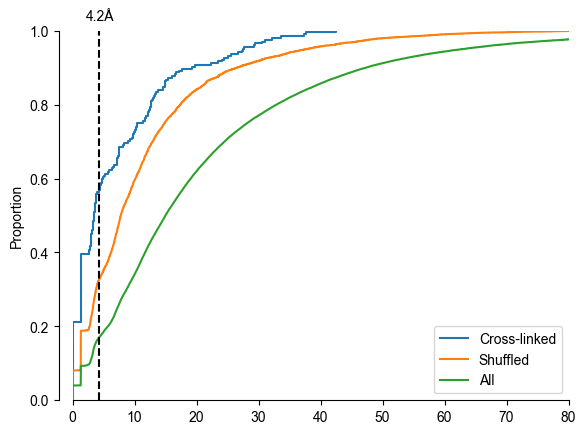

In [48]:
fig,ax = plt.subplots()
cross_linked = cross_linked_aa_data['Distance_to_PLIP'].values
all_data = exp_gt_table['Distance_to_PLIP'].values
random_data = randomised_amino_acid_distances
sns.ecdfplot(cross_linked,label="Cross-linked",ax=ax)
sns.ecdfplot(random_data,label="Shuffled",ax=ax)
sns.ecdfplot(all_data,label="All",ax=ax)
ax.legend()

# Adding a vertical line marking 4.2Å distance:
ax.vlines(x=4.2,ymin=0,ymax=1,linestyle="--",color="black")

# Add label to the vertical line
plt.text(4.5, 1.02, '4.2Å', rotation=0,verticalalignment='bottom',horizontalalignment='center')

# Set the x-axis limits
ax.set_xlim([0,80])  # Adjust the limits as needed

# Adjust the position of the spines
ax.spines['left'].set_position(('outward', 10))

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sys.stdout.write(f"Cross-linked vs all amino acids:\t{ks_2samp(cross_linked,all_data)}\n")
sys.stdout.write(f"Cross-linked vs random amino acids:\t{ks_2samp(cross_linked,random_data)}\n")

fig.savefig(f"{out_dir}/Cross_linked_amino_acids_vs_Shuffled_and_Total_PLIP_data_ecdf_plot.pdf",dpi=400)

### How many cross-linked amino acids overlapped with PLIP sites?

In [49]:
uniprots_with_PLIP = list(set(exp_gt_table.loc[exp_gt_table['Distance_to_PLIP'] > 0.0,'ID']))
all_PLIP = len(cross_linked_aa_data.loc[cross_linked_aa_data['ID'].isin(uniprots_with_PLIP)].index)
cl_PLIP = len(cross_linked_aa_data.loc[cross_linked_aa_data['Distance_to_PLIP'] == 0.0].index)

In [50]:
print(f"Total cross-linked residues:\t{all_PLIP}\nPLIP overlap:\t{cl_PLIP}\nPercentage:\t{(cl_PLIP/all_PLIP)*100}")

Total cross-linked residues:	204
PLIP overlap:	43
Percentage:	21.07843137254902


### How many cross-linked amino acids are within hydrogen bonding of PLIP sites?

In [51]:
uniprots_with_PLIP = list(set(exp_gt_table.loc[exp_gt_table['Distance_to_PLIP'] <= 4.2,'ID']))
all_RNA = len(cross_linked_aa_data.loc[cross_linked_aa_data['ID'].isin(uniprots_with_PLIP)].index)
cl_RNA = len(cross_linked_aa_data.loc[cross_linked_aa_data['Distance_to_PLIP'] <= 4.2].index)

In [52]:
print(f"Total cross-linked residues:\t{all_RNA}\nWithin H-bond:\t{cl_RNA}\nPercentage:\t{(cl_RNA/all_RNA)*100}")

Total cross-linked residues:	204
Within H-bond:	115
Percentage:	56.372549019607845


### Now what type of interactions were detected?

In [53]:
PLIP_only = cross_linked_aa_data.loc[cross_linked_aa_data['all'] >= 1]
PLIP_only.replace(np.nan,0,inplace=True)

In [54]:
PLIP_only.head()

ID         pdb_id  residue_number amino_acid  Peptide  \
252    P37108  P37108_merged              27          Y      1.0   
7629   O75817  O75817_merged              43          T      1.0   
11953  P05455  P05455_merged              23          Y      1.0   
11964  P05455  P05455_merged              34          K      1.0   
12902  P09132  P09132_merged              19          Y      1.0   

       Cross-linked_amino_acid  Distance_to_RNA  hbond  hydrophobic  \
252                        1.0             1.95    4.0          2.0   
7629                       1.0             2.42    1.0          0.0   
11953                      1.0             3.22    0.0          0.0   
11964                      1.0             2.93    2.0          1.0   
12902                      1.0             2.23    3.0          0.0   

       saltbridge  pication  pistacking  all  Distance_to_PLIP  
252           0.0       0.0         1.0  7.0               0.0  
7629          0.0       0.0         0.0  1.0               0.0  
11953         0.0       0.0         5.0  5.0               0.0  
11964         2.0       0.0         0.0  5.0               0.0  
12902         0.0       0.0         0.0  3.0               0.0

In [55]:
columns = ['hbond','hydrophobic','saltbridge','pication','pistacking']

interaction_dict = defaultdict(int)

for column in columns:
    counts = len(PLIP_only.loc[PLIP_only[column] > 0].index)
    interaction_dict[column] = counts
    
### How many of these interactions do we find in all PLIP sites?
PLIP_all = exp_gt_table.loc[exp_gt_table['all'] >= 1]

all_interaction_dict = defaultdict(int)
for column in columns:
    counts = len(PLIP_all.loc[PLIP_all[column] > 0].index)
    all_interaction_dict[column] = counts

In [56]:
interaction_dict

defaultdict(int,
            {'hbond': 18,
             'hydrophobic': 9,
             'saltbridge': 3,
             'pication': 4,
             'pistacking': 25})

In [57]:
all_interaction_dict

defaultdict(int,
            {'hbond': 2028,
             'hydrophobic': 163,
             'saltbridge': 767,
             'pication': 147,
             'pistacking': 183})

### Now dividing the interaction dict by all interactions detected:

In [58]:
normalised_interaction_dict = defaultdict(int)

for column in columns:
    counts = interaction_dict[column]
    total = all_interaction_dict[column]
    fraction = counts/total
    normalised_interaction_dict[column] = fraction

### Now make a pie chart from these counts:

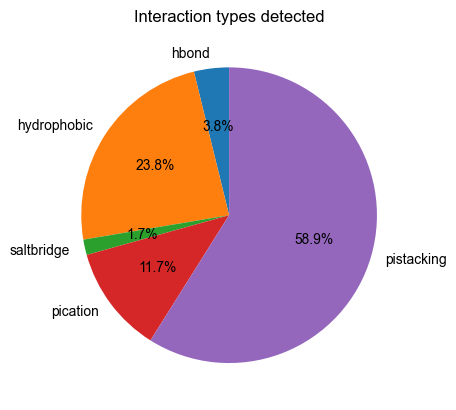

In [59]:
# Creating a figure and an axis object
fig, ax = plt.subplots()

# Plotting the pie chart
ax.pie(normalised_interaction_dict.values(),
       labels=interaction_dict.keys(), 
       autopct='%1.1f%%', 
       startangle=90)
ax.set_title('Interaction types detected')

fig.savefig(f"{out_dir}/Interaction_types_pie_chart.pdf",dpi=400)

### Now I will plot how far away (in amino acids) a cross-linked amino acid was from a known RNA-binding amino acid:

### What amino acids were cross-linked?

### Pi-stacking:

In [60]:
pi_stacked = cross_linked_aa_data.loc[cross_linked_aa_data['pistacking'] >= 1]

In [61]:
amino_acid_dict = defaultdict(lambda: defaultdict(int))

for i in pi_stacked['amino_acid'].values:
    amino_acid_dict['pistacking'][i] += 1

In [62]:
amino_acid_dict

defaultdict(<function __main__.<lambda>()>,
            {'pistacking': defaultdict(int,
                         {'Y': 6, 'F': 15, 'H': 3, 'W': 1})})

### Hydrophobic:

In [63]:
hydrophobic = cross_linked_aa_data.loc[cross_linked_aa_data['hydrophobic'] >= 1]

In [64]:
for i in hydrophobic['amino_acid'].values:
    amino_acid_dict['hydrophobic'][i] += 1

In [65]:
pication = cross_linked_aa_data.loc[cross_linked_aa_data['pication'] >= 1]

In [66]:
for i in pication['amino_acid'].values:
    amino_acid_dict['pication'][i] += 1

In [67]:
amino_acid_dict

defaultdict(<function __main__.<lambda>()>,
            {'pistacking': defaultdict(int, {'Y': 6, 'F': 15, 'H': 3, 'W': 1}),
             'hydrophobic': defaultdict(int,
                         {'Y': 3, 'K': 1, 'P': 1, 'F': 3, 'L': 1}),
             'pication': defaultdict(int, {'R': 1, 'H': 2, 'Y': 1})})

In [68]:
for i in ['pistacking','hydrophobic','pication']:
    for j in amino_acid_dict[i]:
        amino_acid_dict['total'][j] += amino_acid_dict[i][j]

In [69]:
amino_acid_dict

defaultdict(<function __main__.<lambda>()>,
            {'pistacking': defaultdict(int, {'Y': 6, 'F': 15, 'H': 3, 'W': 1}),
             'hydrophobic': defaultdict(int,
                         {'Y': 3, 'K': 1, 'P': 1, 'F': 3, 'L': 1}),
             'pication': defaultdict(int, {'R': 1, 'H': 2, 'Y': 1}),
             'total': defaultdict(int,
                         {'Y': 10,
                          'F': 18,
                          'H': 5,
                          'W': 1,
                          'K': 1,
                          'P': 1,
                          'L': 1,
                          'R': 1})})

In [70]:
results = pd.DataFrame(amino_acid_dict).replace(np.nan,0)

In [71]:
results

pistacking  hydrophobic  pication  total
Y         6.0          3.0       1.0     10
F        15.0          3.0       0.0     18
H         3.0          0.0       2.0      5
W         1.0          0.0       0.0      1
K         0.0          1.0       0.0      1
P         0.0          1.0       0.0      1
L         0.0          1.0       0.0      1
R         0.0          0.0       1.0      1

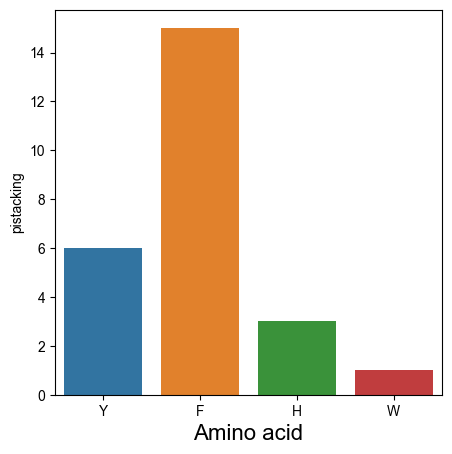

In [72]:
fig,ax = plt.subplots(figsize=[5,5])

selection = results.loc[results['pistacking'] >= 1]
sns.barplot(x=selection.index,y='pistacking',data=selection,ax=ax)
ax.set_xlabel('Amino acid',fontsize=16)
fig.savefig(f"{out_dir}/Amino_acids_involved_in_pistacking.pdf",dpi=400)

### For what uniprot ID's do we have PLIP and hydrophobic interactions?
Check some of these in pymol!

In [73]:
print(list(set(cross_linked_aa_data.loc[cross_linked_aa_data['pistacking'] >= 1,'ID'])))

['Q93062', 'P09651', 'P11940', 'P23246', 'Q4G0J3', 'P67809', 'Q86W50', 'P37108', 'Q15717', 'Q6PKG0', 'Q92879', 'Q14671', 'P26368', 'O00425', 'P22626', 'Q5TC82', 'P05455']


In [74]:
window = 20

In [75]:
uniprot_ids = sorted(set(exp_gt_table.loc[:,'ID']))
count_table = list()
distance_table = list()

for uniprot_id in uniprot_ids:
    selected_data = exp_gt_table.loc[exp_gt_table['ID'] == uniprot_id]
    plip_locations = selected_data.loc[selected_data['all'] == 1, 'residue_number'].values
    if sum(plip_locations) >= 1:
        all_residues = selected_data.loc[:,'residue_number'].values
        boundary_start = min(all_residues)
        boundary_end = max(all_residues)
        for pos in plip_locations:
            
            ### Starting upstream of the plip site:
            if pos - window < boundary_start:
                up_range = np.arange(boundary_start,pos+1,1)
            else:
                up_range = np.arange(pos-window,pos+1,1)
            
            #### Now doing the counting:
            for i in up_range:
                cross_linking_sites = selected_data.loc[selected_data['residue_number'] == i,'Cross-linked_amino_acid']
                if sum(cross_linking_sites) > 0:
                    difference = i - pos
                    count_table.append(difference)
                    
                    ### Grabbing the distance from RNA:
                    distance_table.append(selected_data.loc[selected_data['residue_number'] == i,'Distance_to_RNA'].values[0])
                    
                    
            ### Now downstream:
            if pos + window > boundary_end:
                down_range = np.arange(pos,boundary_end+1,1)
            else:
                down_range = np.arange(pos,pos+window+1,1)
                
            for i in down_range:
                cross_linking_sites = selected_data.loc[selected_data['residue_number'] == i,'Cross-linked_amino_acid']
                if sum(cross_linking_sites) > 0:
                    difference = i - pos
                    count_table.append(difference)
                    
                    ### Grabbing the distance from RNA:
                    distance_table.append(selected_data.loc[selected_data['residue_number'] == i,'Distance_to_RNA'].values[0])

### Now plotting the data:
This plots how many amino acids away the cross-linked amino acid is from a PLIP site:

In [76]:
location_counter = defaultdict(int)
for i in count_table:
    location_counter[i] += 1

/home/pyrbdome/anaconda3/envs/pyrbdome/lib/python3.10/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


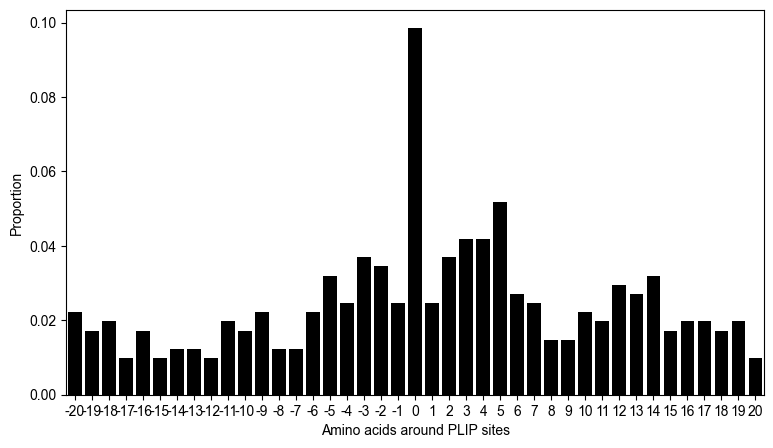

In [77]:
# Convert counts to a distribution (proportions that sum up to 1)
total_counts = sum(location_counter.values())
distribution = {k: v / total_counts for k, v in location_counter.items()}

# Plotting
fig, ax = plt.subplots(figsize=[9,5])
sns.barplot(x=list(distribution.keys()), y=list(distribution.values()),color='black', ax=ax)

# Set labels
ax.set_xlabel("Amino acids around PLIP sites")
ax.set_ylabel("Proportion")

# Save the figure
fig.savefig(f"{out_dir}/Amino_acids_away_from_PLIP_sites.pdf", dpi=400)

In [79]:
window = 20

In [81]:
uniprot_ids = sorted(set(exp_gt_table.loc[:,'ID']))
count_table = list()
distance_table = list()

for uniprot_id in uniprot_ids:
    selected_data = exp_gt_table.loc[exp_gt_table['ID'] == uniprot_id]
    plip_locations = selected_data.loc[selected_data['all'] == 1, 'residue_number'].values
    if sum(plip_locations) >= 1:
        all_residues = selected_data.loc[:,'residue_number'].values
        boundary_start = min(all_residues)
        boundary_end = max(all_residues)
        for pos in plip_locations:
            
            ### Starting upstream of the plip site:
            if pos - window < boundary_start:
                up_range = np.arange(boundary_start,pos+1,1)
            else:
                up_range = np.arange(pos-window,pos+1,1)
            
            #### Now doing the counting:
            for i in up_range:
                cross_linking_sites = selected_data.loc[selected_data['residue_number'] == i,'Cross-linked_amino_acid']
                if sum(cross_linking_sites) > 0:
                    difference = i - pos
                    count_table.append(difference)
                    
                    ### Grabbing the distance from RNA:
                    distance_table.append(selected_data.loc[selected_data['residue_number'] == i,'Distance_to_RNA'].values[0])
                    
                    
            ### Now downstream:
            if pos + window > boundary_end:
                down_range = np.arange(pos,boundary_end+1,1)
            else:
                down_range = np.arange(pos,pos+window+1,1)
                
            for i in down_range:
                cross_linking_sites = selected_data.loc[selected_data['residue_number'] == i,'Cross-linked_amino_acid']
                if sum(cross_linking_sites) > 0:
                    difference = i - pos
                    count_table.append(difference)
                    
                    ### Grabbing the distance from RNA:
                    distance_table.append(selected_data.loc[selected_data['residue_number'] == i,'Distance_to_RNA'].values[0])

### Now plotting the data:
This plots how many amino acids away the cross-linked amino acid is from a PLIP site:

In [82]:
location_counter = defaultdict(int)
for i in count_table:
    location_counter[i] += 1

/home/pyrbdome/anaconda3/envs/pyrbdome/lib/python3.10/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


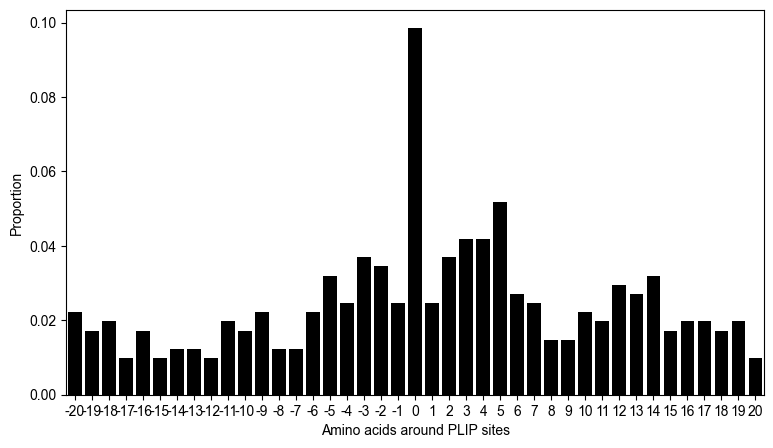

In [83]:
# Convert counts to a distribution (proportions that sum up to 1)
total_counts = sum(location_counter.values())
distribution = {k: v / total_counts for k, v in location_counter.items()}

# Plotting
fig, ax = plt.subplots(figsize=[9,5])
sns.barplot(x=list(distribution.keys()), y=list(distribution.values()),color='black', ax=ax)

# Set labels
ax.set_xlabel("Amino acids around PLIP sites")
ax.set_ylabel("Proportion")

# Save the figure
fig.savefig(f"{out_dir}/Amino_acids_away_from_PLIP_sites.pdf", dpi=400)

### Now do the same for the Distances to RNA data:

In [84]:
uniprot_ids = sorted(set(exp_gt_table.loc[:,'ID']))
count_table = list()
distance_table = list()

for uniprot_id in uniprot_ids:
    selected_data = exp_gt_table.loc[exp_gt_table['ID'] == uniprot_id]
    ground_truth_locations = selected_data.loc[selected_data['Distance_to_RNA'] < 4.2, 'residue_number'].values
    if sum(ground_truth_locations) >= 1:
        all_residues = selected_data.loc[:,'residue_number'].values
        boundary_start = min(all_residues)
        boundary_end = max(all_residues)
        for pos in ground_truth_locations:
            
            ### Starting upstream of the plip site:
            if pos - window < boundary_start:
                up_range = np.arange(boundary_start,pos+1,1)
            else:
                up_range = np.arange(pos-window,pos+1,1)
            
            #### Now doing the counting:
            for i in up_range:
                cross_linking_sites = selected_data.loc[selected_data['residue_number'] == i,'Cross-linked_amino_acid']
                if sum(cross_linking_sites) > 0:
                    difference = i - pos
                    count_table.append(difference)
                    
                    ### Grabbing the distance from RNA:
                    distance_table.append(selected_data.loc[selected_data['residue_number'] == i,'Distance_to_RNA'].values[0])
                    
                    
            ### Now downstream:
            if pos + window > boundary_end:
                down_range = np.arange(pos,boundary_end+1,1)
            else:
                down_range = np.arange(pos,pos+window+1,1)
                
            for i in down_range:
                cross_linking_sites = selected_data.loc[selected_data['residue_number'] == i,'Cross-linked_amino_acid']
                if sum(cross_linking_sites) > 0:
                    difference = i - pos
                    count_table.append(difference)
                    
                    ### Grabbing the distance from RNA:
                    distance_table.append(selected_data.loc[selected_data['residue_number'] == i,'Distance_to_RNA'].values[0])

### Now plotting the data:

In [85]:
location_counter = defaultdict(int)
for i in count_table:
    location_counter[i] += 1

/home/pyrbdome/anaconda3/envs/pyrbdome/lib/python3.10/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


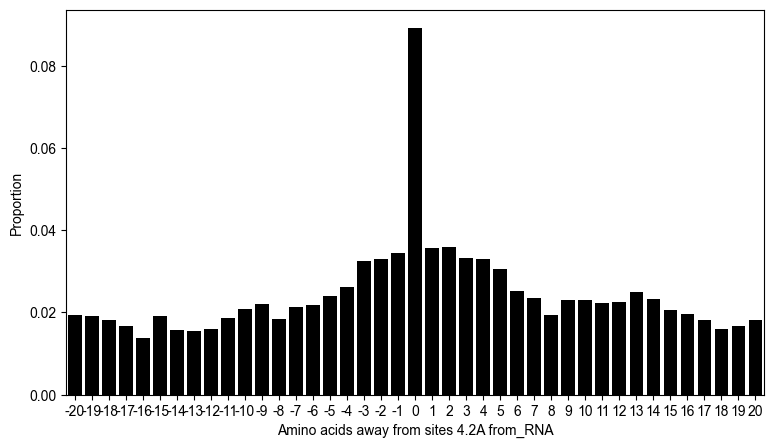

In [86]:
# Convert counts to a distribution (proportions that sum up to 1)
total_counts = sum(location_counter.values())
distribution = {k: v / total_counts for k, v in location_counter.items()}

# Plotting
fig, ax = plt.subplots(figsize=[9,5])
sns.barplot(x=list(distribution.keys()), y=list(distribution.values()),color='black', ax=ax)

# Set labels
ax.set_xlabel("Amino acids away from sites 4.2A from_RNA")
ax.set_ylabel("Proportion")

fig.savefig(f"{out_dir}/Amino_acids_away_from_sites_within_4.2A_from_RNA.pdf",dpi=400)

### Now plotting the distances of the peptide squences to PLIP and Ground Truth distance data:

In [87]:
data_tables = ['RNA_binding_peptides_with_match_in_pdb',
               'trypsin_peptides_with_match_in_pdb',
               'lys_C_peptides_with_match_in_pdb',
               'random_peptides_with_match_in_pdb']

In [88]:
data_table_results_dict = defaultdict(list)

In [89]:
exp_gt_table.head()

ID         pdb_id  residue_number amino_acid  Peptide  \
0  P23396  P23396_merged               1          M      NaN   
1  P23396  P23396_merged               2          A      NaN   
2  P23396  P23396_merged               3          V      NaN   
3  P23396  P23396_merged               4          Q      NaN   
4  P23396  P23396_merged               5          I      NaN   

   Cross-linked_amino_acid  Distance_to_RNA hbond hydrophobic saltbridge  \
0                      NaN             8.07   NaN         NaN        NaN   
1                      NaN             4.78   NaN         NaN        NaN   
2                      NaN             2.88   NaN         NaN        NaN   
3                      NaN             2.62   NaN         NaN        NaN   
4                      NaN             2.85   NaN         NaN        NaN   

  pication pistacking  all  Distance_to_PLIP  
0      NaN        NaN  NaN               NaN  
1      NaN        NaN  NaN               NaN  
2      NaN        NaN  NaN               NaN  
3      NaN        NaN  NaN               NaN  
4      NaN        NaN  NaN               NaN

### Plotting minimum peptide distances to PLIP data:

In [90]:
data_table_PLIP_results_dict = defaultdict(list)

for data in data_tables:
    results = loadTableFromSQLite(data,database_name)
    for uniprot_id in sorted(set(results['ID'])):
        if uniprot_id in list(set(exp_gt_table['ID'])):
            peptides = results.loc[results['ID'] == uniprot_id,'Found_peptide']
            for peptide in peptides:
                if peptide != 'not_found':
                    start,chain,peptide,end,chain = peptide.split("_")
                    min_distance = min(exp_gt_table.loc[(exp_gt_table['ID'] == uniprot_id) &
                                                             (exp_gt_table['residue_number'] >= int(start)) &
                                                             (exp_gt_table['residue_number'] <= int(end)),'Distance_to_PLIP'].values)
                    data_table_PLIP_results_dict[data].append(min_distance)
        

Table 'RNA_binding_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 
Table 'trypsin_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 
Table 'lys_C_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 
Table 'random_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 


Cross-linked vs Random peptides:	KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
Cross-linked vs Trypsin peptides:	KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
Cross-linked vs Lys_c peptides:	KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)


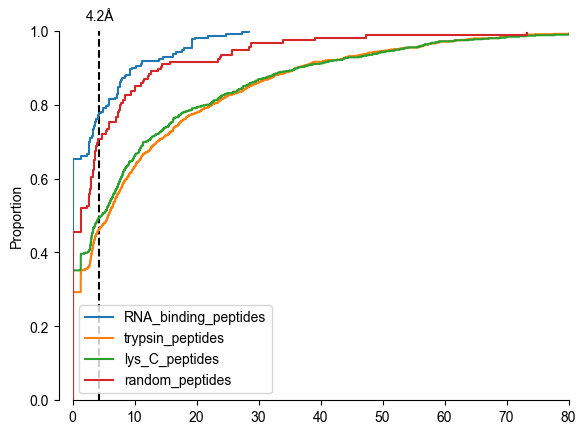

In [91]:
fig,ax = plt.subplots()

# Adding a vertical line marking 4.2Å distance:
ax.vlines(x=4.2,ymin=0,ymax=1,linestyle="--",color="black")

# Add label to the vertical line
plt.text(4.5, 1.02, '4.2Å', rotation=0,verticalalignment='bottom',horizontalalignment='center')

# Set the x-axis limits
ax.set_xlim([0,80])  # Adjust the limits as needed

# Adjust the position of the spines
ax.spines['left'].set_position(('outward', 10))

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for data in data_table_PLIP_results_dict:
    label = data.replace('_with_match_in_pdb','')
    values = data_table_PLIP_results_dict[data]
    sns.ecdfplot(values,label=label,ax=ax)
    
# Printing statistics:
cl   = data_table_PLIP_results_dict[data_tables[0]]
tryp = data_table_PLIP_results_dict[data_tables[1]]
lysc = data_table_PLIP_results_dict[data_tables[2]]
rand = data_table_PLIP_results_dict[data_tables[3]]

sys.stdout.write(f"Cross-linked vs Random peptides:\t{ks_2samp(cl,rand)}\n")
sys.stdout.write(f"Cross-linked vs Trypsin peptides:\t{ks_2samp(cl,tryp)}\n")
sys.stdout.write(f"Cross-linked vs Lys_c peptides:\t{ks_2samp(cl,lysc)}\n")

# Add legend:
ax.legend()

# Save the figure:
fig.savefig(f"{out_dir}/Cross_linked_peptides_vs_random_trypsin_lys_C_PLIP_distances_ecdf_plot.pdf",dpi=400)

### How many cross-linked amino acids overlapped with PLIP sites?

In [92]:
PLIP_overlap_counts_dict = defaultdict(float)

for data in data_table_PLIP_results_dict:
    values = data_table_PLIP_results_dict[data]
    values = pd.Series(values).dropna().tolist()
    total = len(values)
    plip = values.count(0.0)
    ### Dividing by total to get a frequency:
    PLIP_overlap_counts_dict[data] = plip/total

In [93]:
PLIP_overlap_counts_dict

defaultdict(float,
            {'RNA_binding_peptides_with_match_in_pdb': 0.6523809523809524,
             'trypsin_peptides_with_match_in_pdb': 0.2925430210325048,
             'lys_C_peptides_with_match_in_pdb': 0.35149863760217986,
             'random_peptides_with_match_in_pdb': 0.45454545454545453})

### Plotting minimum peptide distances to RNA:

In [94]:
data_table_RNA_dist_results_dict = defaultdict(list)

for data in data_tables:
    results = loadTableFromSQLite(data,database_name)
    for uniprot_id in sorted(set(results['ID'])):
        if uniprot_id in list(set(exp_gt_table['ID'])):
            peptides = results.loc[results['ID'] == uniprot_id,'Found_peptide']
            for peptide in peptides:
                if peptide != 'not_found':
                    start,chain,peptide,end,chain = peptide.split("_")
                    min_distance = min(exp_gt_table.loc[(exp_gt_table['ID'] == uniprot_id) &
                                                             (exp_gt_table['residue_number'] >= int(start)) &
                                                             (exp_gt_table['residue_number'] <= int(end)),'Distance_to_RNA'].values)
                    data_table_RNA_dist_results_dict[data].append(min_distance)
        

Table 'RNA_binding_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 
Table 'trypsin_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 
Table 'lys_C_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 
Table 'random_peptides_with_match_in_pdb' successfully loaded from database 'pyrbdome_full.db' 


Cross-linked vs Random peptides:	KstestResult(statistic=0.1973281228699959, pvalue=4.232783113473935e-06, statistic_location=3.17, statistic_sign=1)
Cross-linked vs Trypsin peptides:	KstestResult(statistic=0.4164217819713798, pvalue=2.3438367766024616e-47, statistic_location=3.38, statistic_sign=1)
Cross-linked vs Lys_c peptides:	KstestResult(statistic=0.3131252229343336, pvalue=5.0517404163264015e-25, statistic_location=3.27, statistic_sign=1)


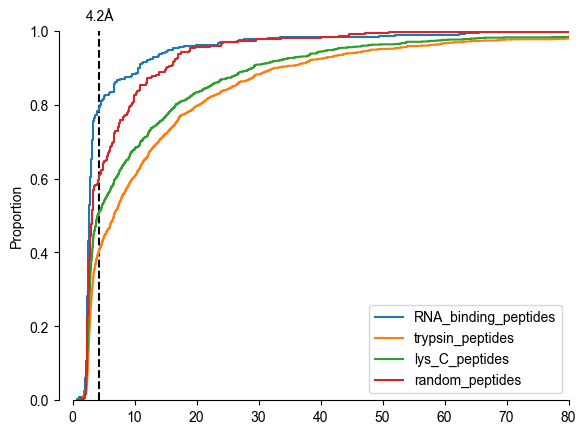

In [95]:
fig,ax = plt.subplots()

# Adding a vertical line marking 4.2Å distance:
ax.vlines(x=4.2,ymin=0,ymax=1,linestyle="--",color="black")

# Add label to the vertical line
plt.text(4.5, 1.02, '4.2Å', rotation=0,verticalalignment='bottom',horizontalalignment='center')

# Set the x-axis limits
ax.set_xlim([0,80])  # Adjust the limits as needed

# Adjust the position of the spines
ax.spines['left'].set_position(('outward', 10))

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for data in data_table_RNA_dist_results_dict:
    label = data.replace('_with_match_in_pdb','')
    values = data_table_RNA_dist_results_dict[data]
    sns.ecdfplot(values,label=label,ax=ax)
    
# Printing statistics:
cl   = data_table_RNA_dist_results_dict[data_tables[0]]
tryp = data_table_RNA_dist_results_dict[data_tables[1]]
lysc = data_table_RNA_dist_results_dict[data_tables[2]]
rand = data_table_RNA_dist_results_dict[data_tables[3]]

sys.stdout.write(f"Cross-linked vs Random peptides:\t{ks_2samp(cl,rand)}\n")
sys.stdout.write(f"Cross-linked vs Trypsin peptides:\t{ks_2samp(cl,tryp)}\n")
sys.stdout.write(f"Cross-linked vs Lys_c peptides:\t{ks_2samp(cl,lysc)}\n")
    
# Add legend:
ax.legend()

# Save the figure:
fig.savefig(f"{out_dir}/Cross_linked_peptides_vs_random_trypsin_lys_C_RNA_distances_ecdf_plot.pdf",dpi=400)

# DONE!